# Scrapbook

This notebook contains some examples of TimeAtlas usage

## Define a TimeSeries

The two essential components are a Pandas Series and a DatetimeIndex

In [1]:
from timeatlas import TimeSeries
from pandas import Series, DatetimeIndex

index = DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04'])
my_series = Series([0.4, 1.0, 0.7, 0.6], index=index)

ts = TimeSeries(my_series)
ts

## Define a Metadata object

In [2]:
from timeatlas import Metadata, types

# You can use some typed metadata object
my_unit = types.Unit("power", "W", "float")
my_sensor = types.Sensor(2902, "HB/floor2/22-23C/Prises_Power_Tot")

# Or use Python dictionaries
my_location = {
    "building" : "Blue Factory",
    "floor" : "12",
    "room"  : "22C"
}
my_coordinates = {
    "lat" : 46.796611,
    "lon" : 7.147563
}
my_dict = {
    "unit": my_unit,
    "sensor": my_sensor,
    "location": my_location,
    "coordinates": my_coordinates
}

# Create the Metadata object
my_meta = Metadata(my_dict)


## Define a TimeSeries with Metadata

In [3]:
ts_meta = TimeSeries(my_series, my_meta)
ts_meta

## Make Predictions

Some definitions:

- `time series` : self-explanatory, i.e. the TimeSeries object
- `horizon` : the duration to predict after the last value of the time series
- `frequency`: the number of values per unit of time. Usually, the frequency is given in Pandas offset aliases (https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases)

```
                                horizon
   |-------------------------|- - - - - -|
                             |||||||||||||
           time series         frequency

```

In [4]:
from timeatlas import models

In [23]:
m1 = models.LinearRegression()
m1.fit(ts)
Y_hat_1 = m1.predict('3 days')

In [26]:
m2 = models.Prophet()
m2.fit(ts)
Y_hat_2 = m2.predict('5 days')

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 2.


In [28]:
Y_hat_2.series

ds
2019-01-05    0.750455
2019-01-06    0.780741
2019-01-07    0.811027
2019-01-08    0.841313
2019-01-09    0.871598
Name: values, dtype: float64

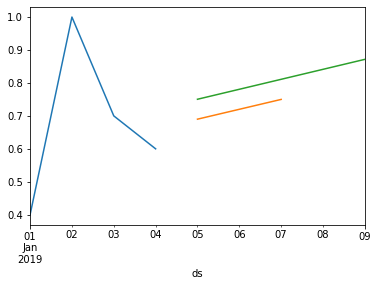

In [27]:
m1.X_train.plot()
Y_hat_1.plot()
Y_hat_2.plot()